# Practice Midterm 2 Designs

## Problem 1

**1.1** Identify the parts in the following API And explain what each part does and what it means all together.

"requests.get(https://www.ncei.noaa.gov/cdo-web/api/v2/ + 'datacategories',headers = {'token':access_token}, params={'startdate': "2018-10-01"})"

### Answer
requests.get() is the Method in the library requests to access an API

"https://www.ncei.noaa.gov/cdo-web/api/v2/ " this is the base URL of the API

"'datacategories'" This is the endpoint section within the URL, its used to make our search for the API within the URL more accurate

"headers = {'token':access_token}" The 'token' within the headers allows the API to indentify us as users and allow us to access the data

"params={'startdate': "2018-10-01"}" This sets the Parameters for our API to find the data that we are looking for. Here we specified the start date of 2018-10-1, which will make the data that we are searching for to be filtered by that date.

All together we are requesting python to get data from the NCEI.NOAA.GOV URL, in the section of "Datacategories, as a user with a specific token to identify ourselves, and the data to be filtered from the start date of 2018/10/01

**1.2** If the response code of our data is over 200, is that good or bad? What should the ideal response status look like?

### Answer 
200 is ideal.

## Problem 2
**Context:**
You are given a list comrpised of school data in Califorina (2007-2022). Each year is its own dataframe.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
files = ['Enr07-08.csv','Enr08-09.csv','Enr09-10.csv','Enr10-11.csv','Enr11-12.csv','Enr12-13.csv','Enr13-14.csv','Enr14-15.csv','Enr15-16.csv','Enr16-17.csv','Enr17-18.csv','Enr18-19.csv','Enr19-20.csv','Enr20-21.csv' ,'Enr21-22.csv','Enr22-23.csv', ]

dfs = []

for file in files:
    df = pd.read_csv(file,low_memory=False)
    dfs.append(df)

**2.1:** Make a function named `get_enr_total`, to get the total enrollemnt for a school in a given year

In [11]:
#ANSWER
def get_enr_total(df,school_name):
    spec_school = df.loc[df['SCHOOL'] == school_name]  
    return np.sum(spec_school['ENR_TOTAL'])
    
get_enr_total(dfs[0],'Coliseum College Prep Academy')

217

**2.2** Make function to draw a line plot for given school (Hint: Use the function `get_enr_total`)

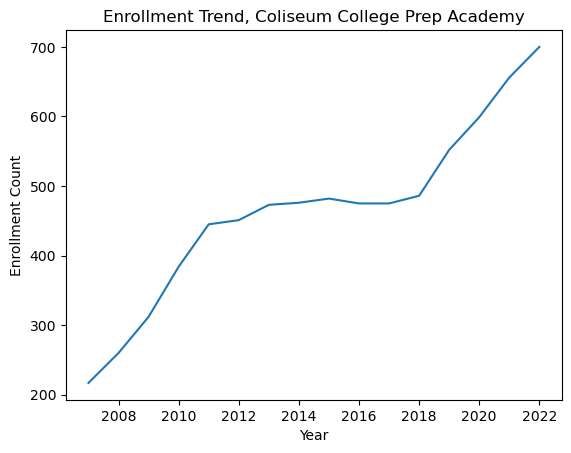

In [12]:
#ANSWER
def trend_enroll_school(school):
    #manipulate the data into a data frame for a line plot
    total_enr_07_22 = [get_enr_total(dfs[i],school) for i in np.arange(len(dfs))]
                   
   

    years_total = pd.DataFrame({'year':np.arange(2007,2023),'yearly_total_enrollment':total_enr_07_22})
    sns.lineplot(data=years_total,x='year',y='yearly_total_enrollment') 
    plt.title('Enrollment Trend, '+ school) 
    plt.xlabel('Year') 
    plt.ylabel('Enrollment Count') 
    plt.show()#line plot of the total enrollment for given school
    
trend_enroll_school('Coliseum College Prep Academy')

## Problem 3
**3.1**
Link to the [data set](https://www.kaggle.com/datasets/lovishbansal123/nasa-asteroids-classification).
The file name is nasa.csv and import the dataset as a pandas DataFrame, name the data set asteriods and check if there are null variables if so name the columns that have it.

In [ ]:
asteriods = pd.read_csv('nasa.csv')
asteriods
np.sum(asteriods.isna())

**3.2** Create a 2 plots one shows the Absolute Magnitude and Orbital Period and see if those asteriods are Hazardous or not. The Seconds Plot is to find the differnce between if the asteriods are hazardous by its Aphelion Dist


In [ ]:
sns.scatterplot(data = asteriods, x= 'Absolute Magnitude', y= 'Orbital Period',hue = 'Hazardous')

In [ ]:
sns.boxplot( x = 'Hazardous',y = 'Aphelion Dist', data = asteriods)

## Problem 4

**4.1** Read in the `property_price.csv` and make a pair plot that is separated by `Affordability Index` by color (optional) *and make the color palette `rainbow`*

In [13]:
properties = pd.read_csv('property_price.csv')
properties

,Rank,City,Price To Income Ratio,Gross Rental Yeild City Centre,Gross Rental Yeild Outside of City,Price To Rent Ratio City Centre,Price To Rent Ratio Outside of City,Mortgage as a Percentage of Income,Affordability Index
0,1,"Santa Barbara, CA",13.3,4.4,6.2,23.0,16.3,103.7,1.0
1,2,"Brooklyn, NY",11.2,4.7,4.3,21.5,23.0,89.9,1.1
2,3,"Queens, NY",11.1,2.8,5.3,35.6,18.8,91.3,1.1
3,4,"New York, NY",10.4,5.6,5.4,17.7,18.7,85.9,1.2
4,5,"Oakland, CA",9.4,6.6,5.4,15.2,18.5,77.5,1.3
...,...,...,...,...,...,...,...,...,...
89,90,"Detroit, MI",1.4,21.7,14.3,4.6,7.0,11.0,9.1
90,91,"Memphis, TN",1.3,38.7,10.4,2.6,9.6,11.0,9.1
91,92,"Tulsa, OK",1.3,15.8,16.2,6.3,6.2,9.9,10.1
92,93,"El Paso, TX",1.2,17.2,17.7,5.8,5.7,10.2,9.8


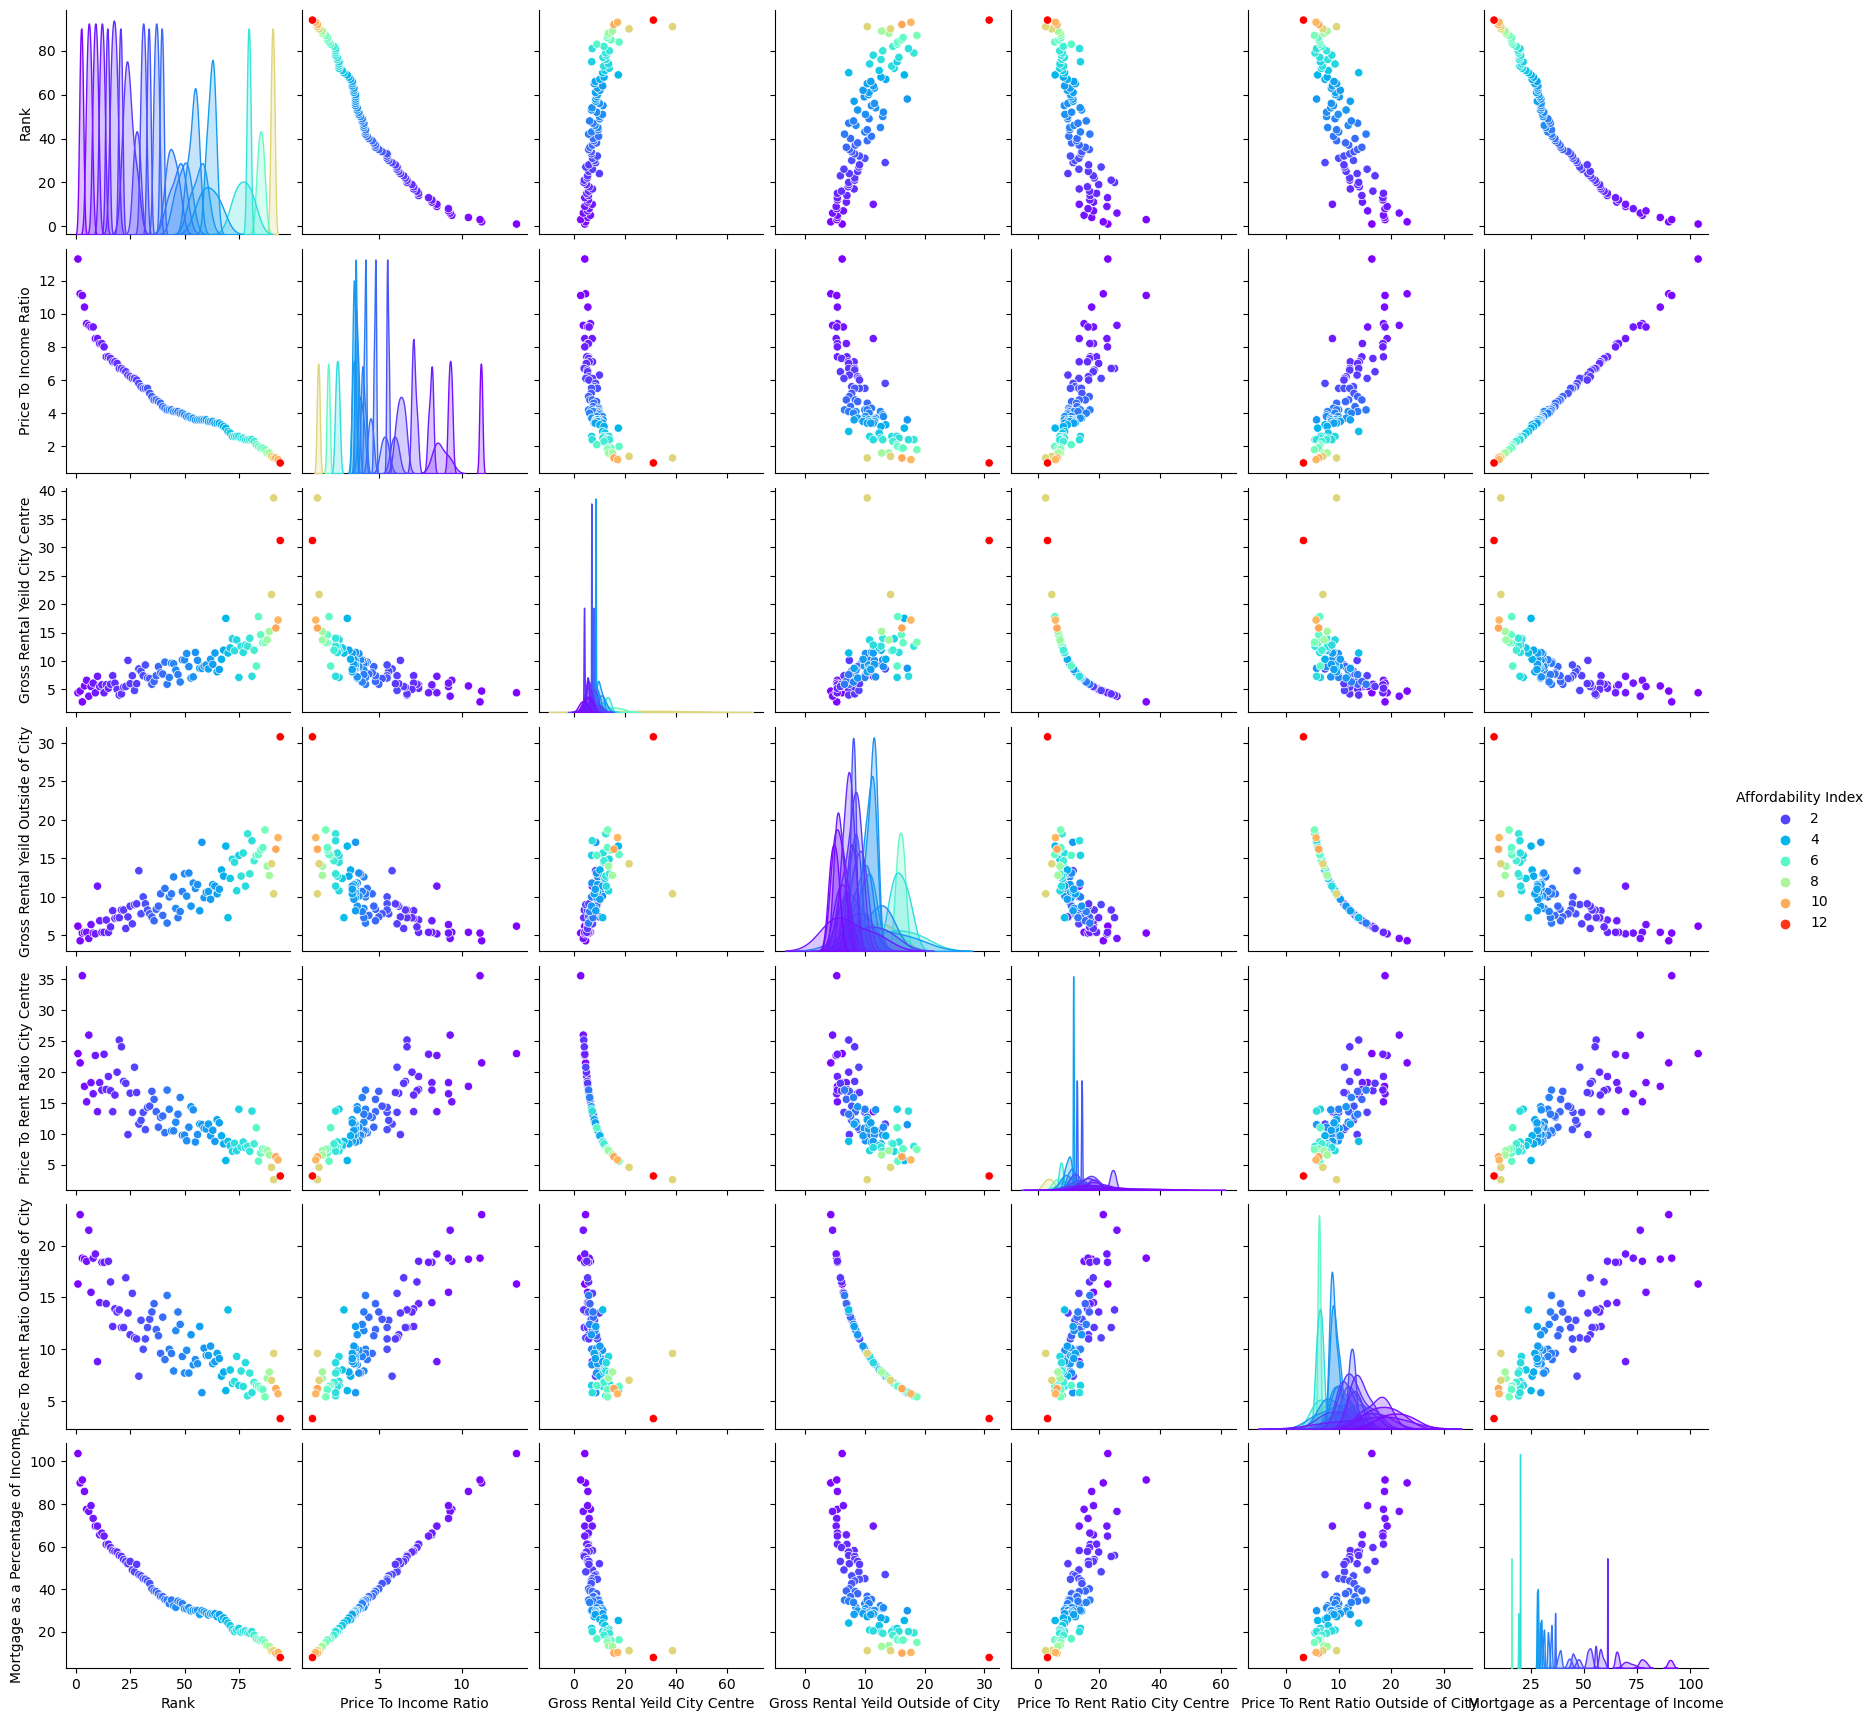

In [14]:
sns.pairplot(data = properties, hue = 'Affordability Index', palette = 'rainbow')

## Problem 5

**5.1** There is a csv file called `family_heights.csv`. Upload it into a pandas dataframe called `heights`.

In [15]:
heights = pd.read_csv('family_heights.csv')

**5.2** Make a count plot that shows how many are male and how many are female.

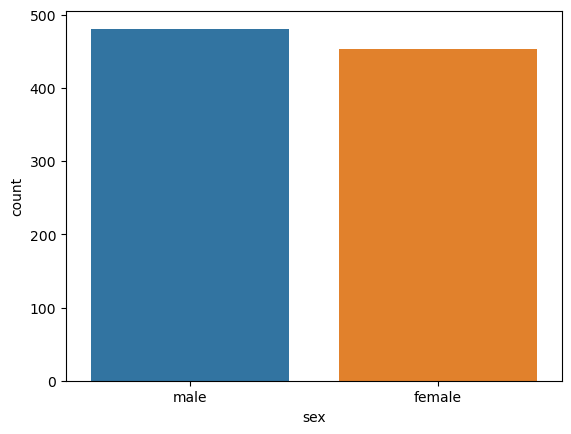

In [16]:
sns.countplot(heights, x='sex')
plt.show()

**5.3** Make another count plot but this time find how many different amounts of children there are.

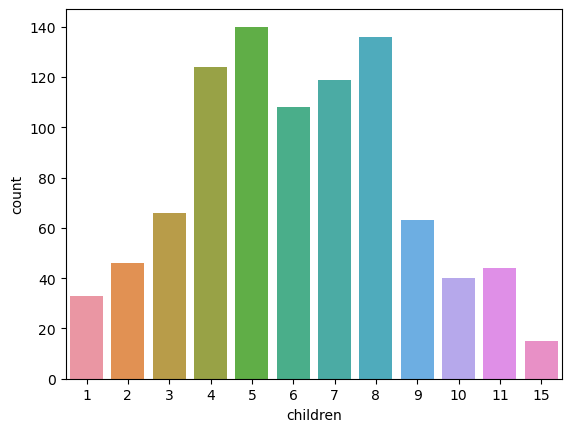

In [17]:
sns.countplot(heights, x='children')
plt.show()

That's wild, 10 ish people had 15 children

## Problem 6

**6.1** Load the penguins dataset, and look at the amount of columns and rows

In [20]:
peng_df = sns.load_dataset('penguins')

**6.2** Find the amount of null values and get rid of them.

In [21]:
peng_df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [22]:
penged = peng_df.dropna()
penged

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


**6.3** Make a plot to compare sex and body mass. (doesnt nessacarily have to be a certain plot just as long as it makes sense.)

<Axes: xlabel='sex', ylabel='body_mass_g'>

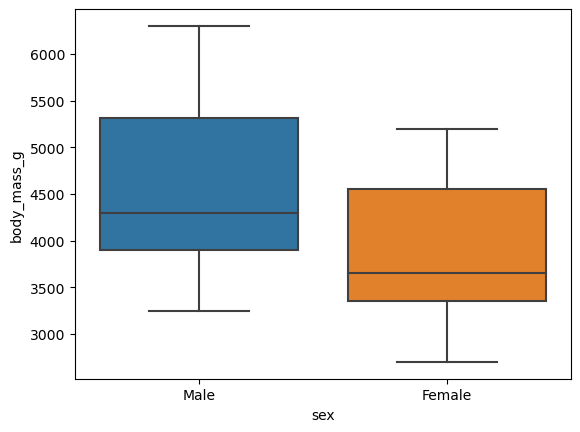

In [23]:
sns.boxplot(data = penged, x= 'sex', y = 'body_mass_g')

**6.4** Next look at flipper length by bill length and sex. 

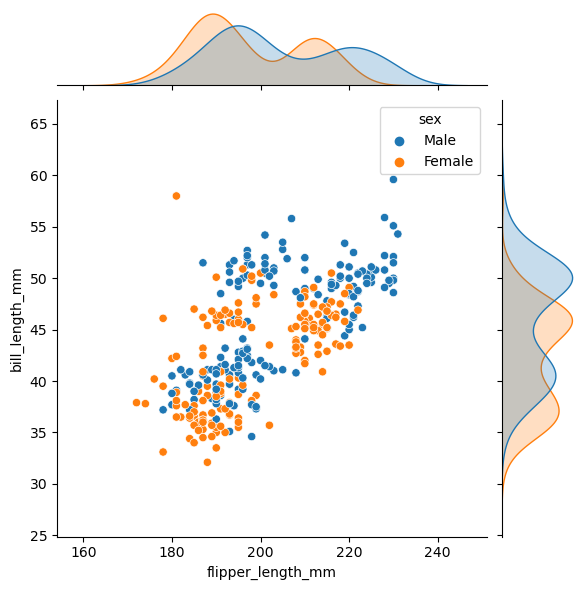

In [24]:
sns.jointplot(data = penged, x = 'flipper_length_mm',y='bill_length_mm', hue = 'sex')

## Problem 7

**7.1** Check for missing values

If missing values are found, handle them appropriately. (The data frame is already created: 'cars_df')  

In [ ]:
# Check for missing values
has_nulls = cars_df.isnull().sum().any()

if has_nulls:
    # If missing values are found, handle them appropriately
    cars_df.dropna(inplace=True)  # Drop rows with missing values

**7.2** Check for and remove duplicated rows from the dataset.

In [ ]:
# Check for and remove duplicated rows
num_duplicates = cars_df.duplicated().sum()

if num_duplicates > 0:
    cars_df.drop_duplicates(inplace=True)  # Remove duplicated rows